In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FinanceDataReader as fdr

In [1]:
# 이동평균선

In [4]:
df = fdr.DataReader('005930', '2020', '2022')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [6]:
df['Close'].pct_change(1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [7]:
# 원금대비 수익률

df['return'] = df['Change'] + 1

In [8]:
df.head()

,Open,High,Low,Close,Volume,Change,return
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921


In [10]:
# 누적수익률

df['return'].cumprod()

Date
2020-01-02    0.989247
2020-01-03    0.994624
2020-01-06    0.994624
2020-01-07    1.000000
2020-01-08    1.017921
                ...   
2021-12-24    1.442652
2021-12-27    1.437276
2021-12-28    1.439068
2021-12-29    1.412186
2021-12-30    1.403226
Name: return, Length: 496, dtype: float64

In [11]:
df['20ma'] = df['Close'].rolling(20).mean()
df['60ma'] = df['Close'].rolling(60).mean()


<AxesSubplot:xlabel='Date'>

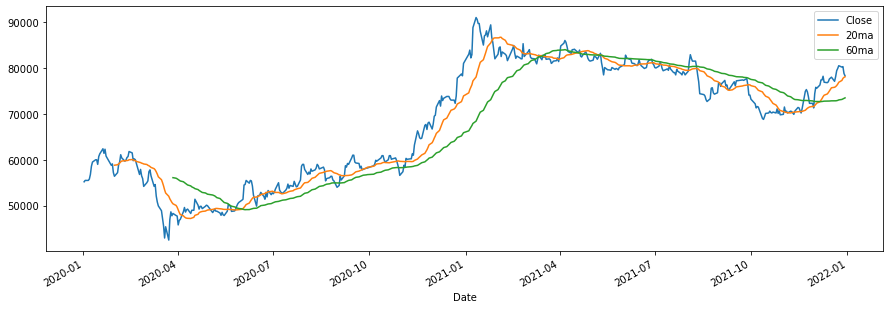

In [12]:
df[['Close', '20ma', '60ma']].plot(figsize = (15,5))

In [13]:
df['20ewma'] = df['Close'].ewm(span=20).mean()
df['60ewma'] = df['Close'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

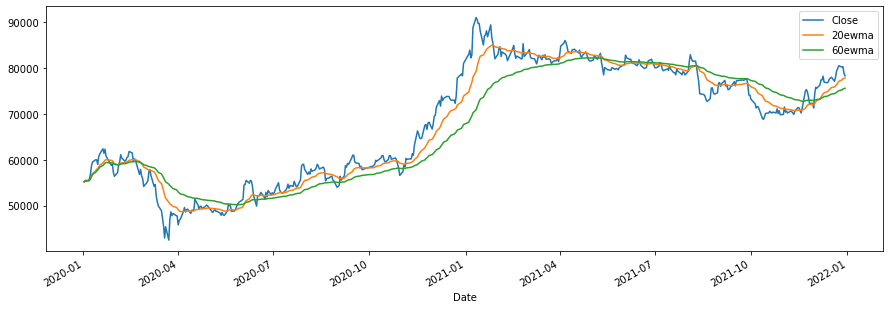

In [14]:
df[['Close', '20ewma', '60ewma']].plot(figsize=(15,5))

In [15]:
# 월평균

df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [17]:
df['ma20'] = df['Close'].rolling(20).mean()

In [16]:
df['stddev'] = df['Close'].rolling(20).std()

In [19]:
df['upper_b'] = df['ma20'] + (df['stddev']*2)

In [18]:
df['lower_b'] = df['ma20'] - (df['stddev']*2)

In [20]:
df.head()

,Open,High,Low,Close,Volume,Change,return,20ma,60ma,20ewma,60ewma,stddev,ma20,lower_b,upper_b
Date,,,,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247,NaN,NaN,55200.000000,55200.000000,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435,NaN,NaN,55357.500000,55352.500000,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000,NaN,NaN,55409.825146,55403.314508,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405,NaN,NaN,55522.462594,55507.498611,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921,NaN,NaN,55831.488021,55783.514535,NaN,NaN,NaN,NaN


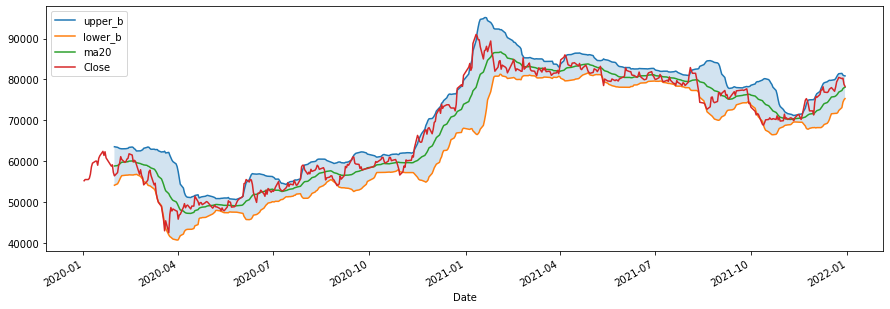

In [22]:
df[['upper_b', 'lower_b', 'ma20', 'Close']].plot(figsize=(15,5))
plt.fill_between(df.index, df.lower_b, df.upper_b, alpha=0.2)

In [23]:
df.drop(['Open', 'High', 'Low', 'Volume', 'Change'], axis=1, inplace=True)

In [24]:
df['stock_pos'] = 0
df['buy_sig'] = (df['stock_pos'].shift(1) == 0) & (df['Close'] <= df['lower_b'])
df['sell_sig'] = (df['Close'].shift(1) > df['ma20'].shift(1)) & (df['Close'] < df['ma20'])

In [28]:
df['buy_sig'] = df['buy_sig'].apply(int)
df['sell_sig'] = df['sell_sig'].apply(int)

In [29]:
con_df = df[(df.buy_sig == 1) | (df.sell_sig == 1)].sort_index()

In [32]:
con_df = con_df.loc['2020-02-28':]

In [3]:
df = pd.read_csv('fin_statement_new.csv')
df.head()

,Code,Name,결산월,상장일,시가총액,유통시가총액,"P/E(Adj., FY End)","P/B(Adj., FY End)","P/S(Adj., FY End)","P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,"DPS(보통주, 현금+주식, 연간)",year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,12,19760324,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,600.0,2006,6460,3.81,11961630.0,195293494.0
1,A000040,KR모터스,12,19760525,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,0.0,2006,1098,-21.98,28190608.0,81250312.0
2,A000050,경방,12,19560303,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,0.0,2006,10339,-1.80,17344611.0,515345506.0
3,A000070,삼양홀딩스,12,19681227,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,1050.0,2006,63563,5.49,60878366.0,973804019.0
4,A000100,유한양행,12,19621101,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,1000.0,2006,24911,7.53,95212024.0,746417156.0


In [4]:
df = df.drop(['결산월', '상장일', 'DPS(보통주, 현금+주식, 연간)'], axis=1)

In [5]:
df = df.rename(columns={'P/E(Adj., FY End)' : 'per',
                       'P/B(Adj., FY End)' : 'pbr',
                       'P/S(Adj., FY End)' : 'psr',
                       'P/FCF1(Adj., FY End)' : 'pcr'})

In [6]:
df.head()

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0
1,A000040,KR모터스,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,2006,1098,-21.98,28190608.0,81250312.0
2,A000050,경방,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,2006,10339,-1.80,17344611.0,515345506.0
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,973804019.0
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,746417156.0


In [7]:
df[df['Name'] == '동화약품']

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0
1479,A000020,동화약품,1.620025e+11,9.694231e+10,18.39,0.92,1.00,12.29,6.72,8.69,2007,10720,3.95,12398017.0,192629355.0
3017,A000020,동화약품,2.893700e+11,1.763710e+11,14.63,1.76,1.80,-73.53,8.05,9.00,2008,6180,4.13,10897247.0,197948382.0
4623,A000020,동화약품,2.346243e+11,1.383111e+11,7.92,1.10,1.20,-2.99,5.44,5.94,2009,7580,10.28,8360598.0,220422961.0
6259,A000020,동화약품,1.673095e+11,9.983358e+10,31.52,1.01,1.46,-53.54,8.25,18.49,2010,5290,10.72,25682734.0,311472628.0
7882,A000020,동화약품,1.228985e+11,7.542279e+10,27.23,0.69,0.69,27.78,6.65,24.75,2011,4080,2.17,7427668.0,308991731.0
9516,A000020,동화약품,1.256916e+11,7.757686e+10,6.45,0.50,0.49,3.12,3.24,5.24,2012,6040,1.72,27437308.0,324009899.0
11169,A000020,동화약품,1.714992e+11,1.080617e+11,128.66,0.74,0.76,39.78,7.91,19.80,2013,4390,5.33,21947412.0,339431477.0
12812,A000020,동화약품,1.661922e+11,1.053991e+11,121.18,0.54,0.56,37.97,7.56,279.96,2014,5570,0.40,14690149.0,324284672.0
14467,A000020,동화약품,2.488694e+11,1.559665e+11,31.51,0.68,0.73,26.46,7.13,26.16,2015,8140,0.32,15561801.0,316165541.0


In [8]:
df[df['year'] == 2017]

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
17930,A000020,동화약품,3.449537e+11,2.134918e+11,8.64,0.89,0.96,-57.91,3.44,4.60,2017,9750,1.78,18088060.0,3.171870e+08
17931,A000040,KR모터스,7.137676e+10,4.291885e+10,-14.49,2.48,1.71,-15.04,-60.09,-30.83,2017,489,-10.91,14530552.0,1.584271e+08
17932,A000050,경방,3.851845e+11,1.612382e+11,14.23,0.62,1.11,5.50,10.52,18.44,2017,13900,1.27,443825602.0,1.259512e+09
17933,A000070,삼양홀딩스,8.692735e+11,3.896953e+11,46.87,0.68,0.46,15.31,6.03,10.20,2017,122000,2.66,203447163.0,1.537285e+09
17934,A000080,하이트진로,1.567486e+12,6.812295e+11,39.18,1.14,0.80,16.90,10.99,23.87,2017,24100,1.55,616896523.0,3.336556e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,A900290,GRT,2.139156e+11,1.311945e+11,NaN,0.00,NaN,NaN,NaN,NaN,2017,3335,NaN,NaN,NaN
19764,A900300,오가닉티코스메틱,1.872832e+11,1.040920e+11,6.52,1.55,1.35,11.96,3.68,3.82,2017,3030,31.91,NaN,NaN
19765,A950110,SBI핀테크솔루션즈,2.157447e+11,5.952397e+10,22.22,2.79,1.01,5.56,-0.21,-0.26,2017,7200,4.22,4972417.0,3.042884e+07
19766,A950130,엑세스바이오,1.399257e+11,1.021458e+11,544.57,2.88,5.10,-8.74,77.25,-1351.73,2017,4580,0.59,2134312.0,6.572819e+07


### ROA 상위 10종목 투자

In [9]:
yearly_price_df = df.pivot(index='year', columns='Name', values='수정주가')
yearly_price_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,830.0,6530.0,NaN,1997.0,1250.0,NaN,NaN,12960.0,2940.0,NaN,...,NaN,NaN,NaN,5356.0,1976.0,NaN,NaN,1979.0,2941.0,1212.0
2007,686.0,5410.0,NaN,1600.0,2200.0,NaN,NaN,26015.0,2607.0,NaN,...,NaN,6385.0,NaN,11430.0,3393.0,NaN,NaN,3011.0,8072.0,1120.0
2008,524.0,930.0,799.0,244.0,835.0,NaN,NaN,8859.0,2566.0,NaN,...,NaN,4538.0,NaN,13179.0,2420.0,NaN,NaN,1053.0,7687.0,210.0
2009,1163.0,5.0,1770.0,911.0,2820.0,NaN,NaN,10362.0,3185.0,NaN,...,NaN,5549.0,NaN,18336.0,2660.0,NaN,NaN,1151.0,11000.0,5.0
2010,3237.0,NaN,1840.0,718.0,1740.0,NaN,NaN,22039.0,5692.0,NaN,...,NaN,4206.0,NaN,19600.0,2320.0,2190.0,NaN,1935.0,8320.0,NaN
2011,24852.0,NaN,912.0,389.0,1125.0,NaN,NaN,25444.0,9685.0,NaN,...,NaN,5494.0,NaN,19950.0,1500.0,2335.0,NaN,1216.0,6310.0,NaN
2012,7160.0,NaN,865.0,69.0,891.0,NaN,NaN,21516.0,5424.0,NaN,...,NaN,9111.0,NaN,25900.0,1585.0,1927.0,NaN,1571.0,6880.0,NaN
2013,4440.0,NaN,1200.0,NaN,620.0,NaN,12350.0,39689.0,7346.0,NaN,...,NaN,27403.0,NaN,24000.0,2000.0,2040.0,NaN,2230.0,5710.0,NaN
2014,2395.0,NaN,NaN,NaN,33.0,NaN,16300.0,80200.0,4544.0,NaN,...,NaN,37199.0,NaN,25100.0,2165.0,1737.0,NaN,4977.0,4660.0,NaN


In [10]:
yearly_rtn_df = yearly_price_df.pct_change().shift(-1)
yearly_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,-0.173494,-0.171516,NaN,-0.198798,0.760000,NaN,NaN,1.007330,-0.113265,NaN,...,NaN,NaN,NaN,1.134055,0.717105,NaN,NaN,0.521475,1.744645,-0.075908
2007,-0.236152,-0.828096,NaN,-0.847500,-0.620455,NaN,NaN,-0.659466,-0.015727,NaN,...,NaN,-0.289272,NaN,0.153018,-0.286767,NaN,NaN,-0.650282,-0.047696,-0.812500
2008,1.219466,-0.994624,1.215269,2.733607,2.377246,NaN,NaN,0.169658,0.241231,NaN,...,NaN,0.222785,NaN,0.391304,0.099174,NaN,NaN,0.093067,0.430987,-0.976190
2009,1.783319,0.000000,0.039548,-0.211855,-0.382979,NaN,NaN,1.126906,0.787127,NaN,...,NaN,-0.242026,NaN,0.068935,-0.127820,NaN,NaN,0.681147,-0.243636,0.000000
2010,6.677479,0.000000,-0.504348,-0.458217,-0.353448,NaN,NaN,0.154499,0.701511,NaN,...,NaN,0.306229,NaN,0.017857,-0.353448,0.066210,NaN,-0.371576,-0.241587,0.000000
2011,-0.711894,0.000000,-0.051535,-0.822622,-0.208000,NaN,NaN,-0.154378,-0.439959,NaN,...,NaN,0.658355,NaN,0.298246,0.056667,-0.174732,NaN,0.291941,0.090333,0.000000
2012,-0.379888,0.000000,0.387283,0.000000,-0.304153,NaN,NaN,0.844627,0.354351,NaN,...,NaN,2.007683,NaN,-0.073359,0.261830,0.058640,NaN,0.419478,-0.170058,0.000000
2013,-0.460586,0.000000,0.000000,0.000000,-0.946774,NaN,0.319838,1.020711,-0.381432,NaN,...,NaN,0.357479,NaN,0.045833,0.082500,-0.148529,NaN,1.231839,-0.183888,0.000000
2014,-0.025052,0.000000,0.000000,0.000000,0.000000,NaN,-0.269939,-0.211970,1.131382,NaN,...,NaN,0.688782,NaN,-0.390438,0.404157,0.266552,NaN,-0.333936,-0.122318,0.000000


In [11]:
yearly_rtn_df['AD모터스']

year
2006   -0.198798
2007   -0.847500
2008    2.733607
2009   -0.211855
2010   -0.458217
2011   -0.822622
2012    0.000000
2013    0.000000
2014    0.000000
2015    0.000000
2016    0.000000
2017         NaN
Name: AD모터스, dtype: float64

In [12]:
indicator = 'ROA'
top_n = 10

df.groupby(['year'])[indicator].nlargest(top_n)

year       
2006  1079     64.49
      1442     62.61
      1455     58.55
      1402     51.44
      1467     48.40
               ...  
2017  19658    52.05
      19696    48.98
      19730    46.44
      18265    41.83
      19729    39.48
Name: ROA, Length: 120, dtype: float64

In [13]:
top_n_indicator_df = df.groupby(['year'])[indicator].nlargest(top_n).reset_index()
top_n_indicator_df

,year,level_1,ROA
0,2006,1079,64.49
1,2006,1442,62.61
2,2006,1455,58.55
3,2006,1402,51.44
4,2006,1467,48.40
...,...,...,...
115,2017,19658,52.05
116,2017,19696,48.98
117,2017,19730,46.44
118,2017,18265,41.83


In [14]:
top_n_indicator_df[top_n_indicator_df['year'] == 2006]

,year,level_1,ROA
0,2006,1079,64.49
1,2006,1442,62.61
2,2006,1455,58.55
3,2006,1402,51.44
4,2006,1467,48.40
5,2006,1393,46.50
6,2006,1359,45.30
7,2006,1423,43.56
8,2006,1446,41.64
9,2006,1432,41.02


In [15]:
top_n_roa_df = df.loc[top_n_indicator_df['level_1']]
top_n_roa_df

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
1079,A048870,시너지이노베이션,2.522401e+11,1.860019e+11,0.63,0.18,0.10,0.56,7.73,9.24,2006,45925,64.49,4.847450e+05,9.728356e+07
1442,A080000,에스엔유,1.778220e+11,1.152422e+11,11.85,3.28,3.44,-43.05,9.48,10.33,2006,4217,62.61,4.739832e+06,3.121012e+07
1455,A082800,루미마이크로,5.969880e+10,2.824947e+10,36.02,2.22,2.73,-15.02,14.72,41.42,2006,1311,58.55,3.674557e+06,1.983653e+07
1402,A075130,플랜티넷,1.276800e+11,1.326851e+11,27.24,5.14,10.07,51.34,21.08,26.37,2006,16200,51.44,1.988671e+06,2.633992e+07
1467,A084370,유진테크,3.117018e+10,1.472479e+10,NaN,0.00,NaN,NaN,NaN,NaN,2006,1447,48.40,1.324699e+06,1.429712e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19658,A207940,삼성바이오로직스,3.046898e+13,6.636144e+12,-48.50,2.45,29.11,-36.50,-62.10,-44.75,2017,371000,52.05,1.273990e+09,5.960494e+09
19696,A219550,MP한강,1.346901e+11,5.655638e+10,13.32,5.04,2.10,16.92,-0.05,-0.05,2017,1860,48.98,8.242400e+04,1.551397e+07
19730,A238090,앤디포스,1.086472e+11,2.950859e+10,11.50,2.53,2.43,15.41,7.27,7.67,2017,3136,46.44,2.285403e+06,3.492502e+07
18265,A009180,한솔로지스틱스,4.135834e+10,3.231740e+10,12.58,1.04,0.12,-43.30,5.42,9.03,2017,1738,41.83,3.078808e+06,8.939474e+07


In [16]:
indicator_df = top_n_roa_df.pivot(index='year', columns='Name', values = 'ROA')
indicator_df

Name,DMS,GKL,ISC,KG이니시스,MP한강,NAVER,S&K폴리텍,SY,골프존뉴딘,나노캠텍,...,한국가구,한국주강,한국타이어월드와이드,한솔로지스틱스,한화화인케미칼,현대시멘트,현대페인트,현대하이스코,화신테크,휴메딕스
year,,,,,,,,,,,,,,,,,,,,,
2006,45.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,46.09,NaN,NaN,NaN,34.51,NaN,35.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,47.17,NaN,NaN,NaN,36.67,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,41.18,NaN,NaN,NaN,NaN,...,NaN,45.08,NaN,NaN,35.86,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,40.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,32.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,118.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
asset_on_df = indicator_df.notna().astype(int).replace(0, np.nan)
asset_on_df

Name,DMS,GKL,ISC,KG이니시스,MP한강,NAVER,S&K폴리텍,SY,골프존뉴딘,나노캠텍,...,한국가구,한국주강,한국타이어월드와이드,한솔로지스틱스,한화화인케미칼,현대시멘트,현대페인트,현대하이스코,화신테크,휴메딕스
year,,,,,,,,,,,,,,,,,,,,,
2006,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
yearly_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,-0.173494,-0.171516,NaN,-0.198798,0.760000,NaN,NaN,1.007330,-0.113265,NaN,...,NaN,NaN,NaN,1.134055,0.717105,NaN,NaN,0.521475,1.744645,-0.075908
2007,-0.236152,-0.828096,NaN,-0.847500,-0.620455,NaN,NaN,-0.659466,-0.015727,NaN,...,NaN,-0.289272,NaN,0.153018,-0.286767,NaN,NaN,-0.650282,-0.047696,-0.812500
2008,1.219466,-0.994624,1.215269,2.733607,2.377246,NaN,NaN,0.169658,0.241231,NaN,...,NaN,0.222785,NaN,0.391304,0.099174,NaN,NaN,0.093067,0.430987,-0.976190
2009,1.783319,0.000000,0.039548,-0.211855,-0.382979,NaN,NaN,1.126906,0.787127,NaN,...,NaN,-0.242026,NaN,0.068935,-0.127820,NaN,NaN,0.681147,-0.243636,0.000000
2010,6.677479,0.000000,-0.504348,-0.458217,-0.353448,NaN,NaN,0.154499,0.701511,NaN,...,NaN,0.306229,NaN,0.017857,-0.353448,0.066210,NaN,-0.371576,-0.241587,0.000000
2011,-0.711894,0.000000,-0.051535,-0.822622,-0.208000,NaN,NaN,-0.154378,-0.439959,NaN,...,NaN,0.658355,NaN,0.298246,0.056667,-0.174732,NaN,0.291941,0.090333,0.000000
2012,-0.379888,0.000000,0.387283,0.000000,-0.304153,NaN,NaN,0.844627,0.354351,NaN,...,NaN,2.007683,NaN,-0.073359,0.261830,0.058640,NaN,0.419478,-0.170058,0.000000
2013,-0.460586,0.000000,0.000000,0.000000,-0.946774,NaN,0.319838,1.020711,-0.381432,NaN,...,NaN,0.357479,NaN,0.045833,0.082500,-0.148529,NaN,1.231839,-0.183888,0.000000
2014,-0.025052,0.000000,0.000000,0.000000,0.000000,NaN,-0.269939,-0.211970,1.131382,NaN,...,NaN,0.688782,NaN,-0.390438,0.404157,0.266552,NaN,-0.333936,-0.122318,0.000000


In [22]:
selected_return_df = yearly_rtn_df * asset_on_df
selected_return_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
rtn_series = selected_return_df.mean(axis=1)
rtn_series

year
2006    0.057120
2007   -0.605718
2008    0.612971
2009    0.018991
2010   -0.117760
2011    0.191846
2012   -0.055591
2013    0.069049
2014    0.026476
2015   -0.054153
2016    0.160199
2017         NaN
dtype: float64

In [25]:
(rtn_series + 1).cumprod()

year
2006    1.057120
2007    0.416803
2008    0.672292
2009    0.685059
2010    0.604387
2011    0.720336
2012    0.680292
2013    0.727266
2014    0.746521
2015    0.706095
2016    0.819211
2017         NaN
dtype: float64

<AxesSubplot:xlabel='year'>

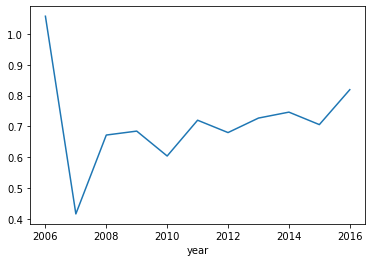

In [27]:
(rtn_series + 1).cumprod().plot()

### 소형주 + 저 pbr 전략

In [29]:
market_cap_quantile_series = df.groupby('year')['시가총액'].quantile(0.2)
market_cap_quantile_series

year
2006    2.466184e+10
2007    2.827930e+10
2008    2.428395e+10
2009    1.740554e+10
2010    2.518032e+10
2011    2.819279e+10
2012    3.007759e+10
2013    3.381917e+10
2014    3.539190e+10
2015    4.683618e+10
2016    5.485006e+10
2017    6.175322e+10
Name: 시가총액, dtype: float64

In [31]:
df.head()

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0
1,A000040,KR모터스,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,2006,1098,-21.98,28190608.0,81250312.0
2,A000050,경방,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,2006,10339,-1.80,17344611.0,515345506.0
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,973804019.0
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,746417156.0


In [37]:
filtered_df = df.join(market_cap_quantile_series, on='year', how='left', rsuffix='quantile_0.2')
filtered_df

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,시가총액quantile_0.2
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0,2.466184e+10
1,A000040,KR모터스,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,2006,1098,-21.98,28190608.0,81250312.0,2.466184e+10
2,A000050,경방,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,2006,10339,-1.80,17344611.0,515345506.0,2.466184e+10
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,973804019.0,2.466184e+10
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,746417156.0,2.466184e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,A900290,GRT,2.139156e+11,1.311945e+11,NaN,0.00,NaN,NaN,NaN,NaN,2017,3335,NaN,NaN,NaN,6.175322e+10
19764,A900300,오가닉티코스메틱,1.872832e+11,1.040920e+11,6.52,1.55,1.35,11.96,3.68,3.82,2017,3030,31.91,NaN,NaN,6.175322e+10
19765,A950110,SBI핀테크솔루션즈,2.157447e+11,5.952397e+10,22.22,2.79,1.01,5.56,-0.21,-0.26,2017,7200,4.22,4972417.0,30428841.0,6.175322e+10
19766,A950130,엑세스바이오,1.399257e+11,1.021458e+11,544.57,2.88,5.10,-8.74,77.25,-1351.73,2017,4580,0.59,2134312.0,65728187.0,6.175322e+10


In [39]:
filtered_df = filtered_df[filtered_df['시가총액'] <= filtered_df['시가총액quantile_0.2']]
filtered_df

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,시가총액quantile_0.2
21,A000440,중앙에너비스,1.519860e+10,5.828663e+09,12.56,0.37,0.17,15.08,7.60,10.19,2006,5234,3.47,4359080.0,51819700.0,2.466184e+10
34,A000760,이화산업,1.115800e+10,5.161691e+09,-0.98,0.27,0.18,-9.36,-5.83,-5.53,2006,3965,-9.84,1457925.0,93661256.0,2.466184e+10
40,A000910,유니온,1.976983e+10,8.811414e+09,22.40,0.32,0.37,5.07,6.73,18.71,2006,1632,0.66,4516111.0,95440233.0,2.466184e+10
44,A001000,신라섬유,1.545000e+10,8.503680e+09,-53.00,1.68,14.95,-13.33,-72.11,-59.79,2006,1120,0.30,25672808.0,39723341.0,2.466184e+10
52,A001140,국보,9.553927e+09,6.067699e+09,258.79,0.55,0.14,3.66,6.75,17.78,2006,800,0.87,12534042.0,71494973.0,2.466184e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19728,A237750,피앤씨테크,6.080818e+10,2.782582e+10,9.51,1.16,1.71,17.10,3.31,3.46,2017,8320,20.25,1368725.0,27009394.0,6.175322e+10
19731,A238120,로고스바이오,5.589796e+10,3.213574e+10,-31.80,2.51,10.50,-21.67,-31.55,-25.34,2017,6228,-3.77,530860.0,6960100.0,6.175322e+10
19744,A250060,모비스,4.686251e+10,2.215659e+10,NaN,NaN,NaN,NaN,NaN,NaN,2017,1720,15.97,1454551.0,8819202.0,6.175322e+10
19754,A900110,이스트아시아홀딩스,4.628266e+10,3.216044e+10,-8.51,0.45,0.75,6.58,3.16,2.52,2017,686,1.59,NaN,NaN,6.175322e+10


In [40]:
filtered_df = filtered_df[filtered_df['pbr'] >= 0.2]

In [41]:
smallest_pbr_series = filtered_df.groupby('year')['pbr'].nsmallest(15)
smallest_pbr_series

year       
2006  882      0.22
      359      0.25
      433      0.25
      1012     0.25
      341      0.26
               ... 
2017  18546    0.40
      18015    0.41
      18188    0.42
      18043    0.43
      18712    0.43
Name: pbr, Length: 180, dtype: float64

In [46]:
selected_index = smallest_pbr_series.index.get_level_values(1)
selected_df=filtered_df.loc[selected_index]
selected_df

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,시가총액quantile_0.2
882,A037240,평안물산,2.115000e+10,2.049858e+10,-0.36,0.22,0.31,-1.85,-4.44,-4.06,2006,113846,-27.23,4493833.0,24299630.0,2.466184e+10
359,A008830,대동기어,7.190019e+09,3.925750e+09,19.21,0.25,0.08,0.90,3.00,13.61,2006,1842,1.19,8026964.0,58404722.0,2.466184e+10
433,A011300,성안,1.762608e+10,1.075014e+10,44.76,0.25,0.23,3.01,9.79,16.14,2006,329,3.52,6863195.0,126931054.0,2.466184e+10
1012,A044180,KD건설,2.351100e+10,1.679391e+10,18.05,0.25,0.18,-1.66,8.91,27.25,2006,1166603,1.25,13932463.0,45560783.0,2.466184e+10
341,A008110,대동전자,2.210000e+10,1.429207e+10,26.80,0.26,0.96,-9.68,-15.95,138.70,2006,2411,-1.86,11293319.0,90318981.0,2.466184e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18546,A028080,휴맥스홀딩스,5.785653e+10,2.907291e+10,-36.02,0.40,15.65,8.90,-99.16,-97.49,2017,4640,-10.24,5060142.0,179738302.0,6.175322e+10
18015,A002070,남영비비안,4.944920e+10,9.059094e+09,-25.90,0.41,0.31,-13.89,-697.12,-28.04,2017,3257,3.42,3154966.0,158952348.0,6.175322e+10
18188,A006110,삼아알미늄,3.773000e+10,1.775951e+10,43.53,0.42,0.34,25.90,9.64,27.08,2017,3245,-1.74,31204930.0,188596464.0,6.175322e+10
18043,A002690,동일제강,4.950000e+10,1.914165e+10,11.89,0.43,0.60,18.07,4.51,6.86,2017,3265,4.66,4833432.0,144589506.0,6.175322e+10


In [47]:
selected_df = selected_df.pivot(index='year', columns='Name', values='pbr')
selected_df.head()

Name,CU전자,KD건설,SG충방,고려산업,광림,국동,국보,국일제지,금비,까뮤이앤씨,...,한일단조,한일철강,한일화학,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화천기계,휴맥스홀딩스
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,0.28,NaN,0.33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,0.4,NaN,NaN,NaN,0.32,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,0.24,0.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
asset_on_df = selected_df.notna().astype(int).replace(0, np.nan)
asset_on_df

Name,CU전자,KD건설,SG충방,고려산업,광림,국동,국보,국일제지,금비,까뮤이앤씨,...,한일단조,한일철강,한일화학,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화천기계,휴맥스홀딩스
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
selected_rtn_df = yearly_rtn_df * asset_on_df
selected_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
selected_rtn_df.mean(axis=1)

year
2006    0.666900
2007   -0.385909
2008    0.150773
2009    0.688427
2010   -0.062449
2011   -0.097917
2012    0.134842
2013    0.410767
2014    0.556706
2015    0.175729
2016   -0.088552
2017         NaN
dtype: float64

In [51]:
cum_rtn_str_df = (selected_rtn_df.mean(axis=1) + 1).cumprod()

<AxesSubplot:xlabel='year'>

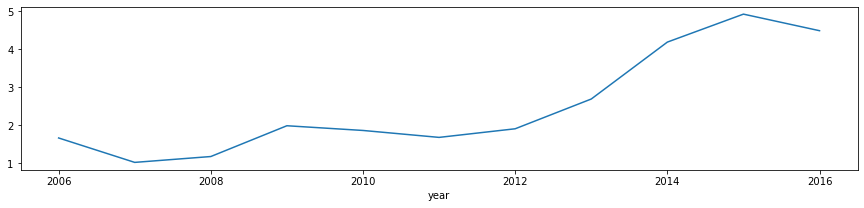

In [52]:
cum_rtn_str_df.plot(figsize=(15,3))

### 벤저민 그레엄

In [53]:
# ROA 5% 이상
# 부채비율 50% 이하
# pbr 0.2 이상
# pbr 낮은 순으로 20~30개 매수

In [54]:
filtered_df = df[df['ROA'] >= 0.05]

filtered_df['부채비율'] = filtered_df['비유동부채'] / filtered_df['자산총계']

filtered_df = filtered_df[filtered_df['부채비율'] <= 0.5]

filtered_df = filtered_df[filtered_df['pbr'] >= 0.2]

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_12724/3790772276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['부채비율'] = filtered_df['비유동부채'] / filtered_df['자산총계']


In [55]:
smallest_pbr_series = filtered_df.groupby('year')['pbr'].nsmallest(15)
smallest_pbr_series

year       
2006  121      0.20
      174      0.21
      1244     0.21
      176      0.22
      542      0.22
               ... 
2017  18955    0.30
      18073    0.31
      17953    0.33
      18306    0.35
      18075    0.36
Name: pbr, Length: 180, dtype: float64

In [56]:
selected_index = smallest_pbr_series.index.get_level_values(1)
selected_df = filtered_df.loc[selected_index]
selected_df

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,부채비율
121,A002670,미주제강,3.480859e+10,2.332176e+10,5.79,0.20,0.06,-3.67,8.47,15.33,2006,835,16.21,15349579.0,8.622476e+07,0.178018
174,A003780,진양산업,3.459840e+10,1.854128e+10,11.22,0.21,0.76,5.24,6.34,9.21,2006,571,2.38,7997698.0,9.448557e+07,0.084645
1244,A058900,투미비티,4.257900e+10,3.700541e+10,-0.76,0.21,0.13,3.13,-17.69,-8.63,2006,27246,8.03,279325.0,1.716653e+07,0.016271
176,A003830,대한화섬,9.322560e+10,2.767868e+10,5.09,0.22,0.30,1.89,1.49,2.83,2006,121500,1.42,1623648.0,3.263187e+08,0.004976
542,A016380,동부제철,2.837339e+11,1.092376e+11,13.72,0.22,0.09,5.60,5.54,12.28,2006,633429,5.56,283855450.0,2.245221e+09,0.126427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,A058650,세아홀딩스,5.320000e+11,5.320000e+10,5.73,0.30,0.13,2.74,4.06,7.42,2017,152000,4.44,70862406.0,9.804313e+08,0.072277
18073,A003240,태광산업,1.329400e+12,4.329854e+11,73.75,0.31,0.39,5.27,1.37,4.30,2017,1317000,2.72,100315979.0,2.545069e+09,0.039416
17953,A000500,가온전선,9.880824e+10,5.610332e+10,24.12,0.33,0.12,2.42,9.08,16.94,2017,22950,0.41,80513598.0,4.898973e+08,0.164348
18306,A010660,화천기계,4.708000e+10,2.611057e+10,-18.97,0.35,0.24,5.85,-82.76,-1.97,2017,2170,1.35,2158530.0,1.597838e+08,0.013509


In [57]:
selected_df = selected_df.pivot(index = 'year', columns = 'Name', values='pbr')
selected_df

Name,CS홀딩스,DB하이텍,E1,KD건설,KISCO홀딩스,NICE평가정보,POSCO,SG세계물산,SIMPAC Metal,TBH글로벌,...,한국제지,한라,한일시멘트,현대시멘트,형지I&C,화성산업,화승알앤에이,화승인더,화천기계,휴스틸
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,0.36,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.31,NaN,NaN,NaN,0.32,NaN,NaN
2009,NaN,NaN,NaN,NaN,0.20,0.20,NaN,NaN,NaN,0.21,...,NaN,0.21,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,0.21,NaN,0.23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20,NaN,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.21,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN


In [58]:
asset_on_df = selected_df.notna().astype(int).replace(0, np.nan)
asset_on_df

Name,CS홀딩스,DB하이텍,E1,KD건설,KISCO홀딩스,NICE평가정보,POSCO,SG세계물산,SIMPAC Metal,TBH글로벌,...,한국제지,한라,한일시멘트,현대시멘트,형지I&C,화성산업,화승알앤에이,화승인더,화천기계,휴스틸
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2009,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [60]:
yearly_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,-0.173494,-0.171516,NaN,-0.198798,0.760000,NaN,NaN,1.007330,-0.113265,NaN,...,NaN,NaN,NaN,1.134055,0.717105,NaN,NaN,0.521475,1.744645,-0.075908
2007,-0.236152,-0.828096,NaN,-0.847500,-0.620455,NaN,NaN,-0.659466,-0.015727,NaN,...,NaN,-0.289272,NaN,0.153018,-0.286767,NaN,NaN,-0.650282,-0.047696,-0.812500
2008,1.219466,-0.994624,1.215269,2.733607,2.377246,NaN,NaN,0.169658,0.241231,NaN,...,NaN,0.222785,NaN,0.391304,0.099174,NaN,NaN,0.093067,0.430987,-0.976190
2009,1.783319,0.000000,0.039548,-0.211855,-0.382979,NaN,NaN,1.126906,0.787127,NaN,...,NaN,-0.242026,NaN,0.068935,-0.127820,NaN,NaN,0.681147,-0.243636,0.000000
2010,6.677479,0.000000,-0.504348,-0.458217,-0.353448,NaN,NaN,0.154499,0.701511,NaN,...,NaN,0.306229,NaN,0.017857,-0.353448,0.066210,NaN,-0.371576,-0.241587,0.000000
2011,-0.711894,0.000000,-0.051535,-0.822622,-0.208000,NaN,NaN,-0.154378,-0.439959,NaN,...,NaN,0.658355,NaN,0.298246,0.056667,-0.174732,NaN,0.291941,0.090333,0.000000
2012,-0.379888,0.000000,0.387283,0.000000,-0.304153,NaN,NaN,0.844627,0.354351,NaN,...,NaN,2.007683,NaN,-0.073359,0.261830,0.058640,NaN,0.419478,-0.170058,0.000000
2013,-0.460586,0.000000,0.000000,0.000000,-0.946774,NaN,0.319838,1.020711,-0.381432,NaN,...,NaN,0.357479,NaN,0.045833,0.082500,-0.148529,NaN,1.231839,-0.183888,0.000000
2014,-0.025052,0.000000,0.000000,0.000000,0.000000,NaN,-0.269939,-0.211970,1.131382,NaN,...,NaN,0.688782,NaN,-0.390438,0.404157,0.266552,NaN,-0.333936,-0.122318,0.000000


In [59]:
rtn_series = (yearly_rtn_df * asset_on_df).mean(axis=1)

In [61]:
cum_rtn_str_df = (rtn_series + 1).cumprod()

<AxesSubplot:xlabel='year'>

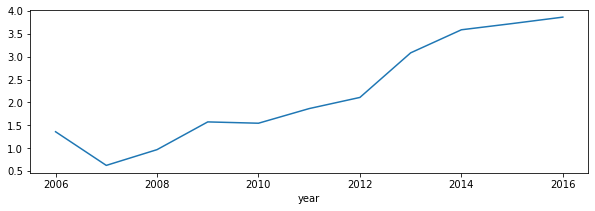

In [62]:
cum_rtn_str_df.plot(figsize = (10,3))

In [63]:
###########################################################################################

In [64]:
price_df = pd.read_csv('수정주가.csv', encoding='euckr').head()

In [65]:
raw_df = pd.read_excel('재무데이터 수정.xlsx')

In [68]:
raw_df.head()

,Symbol,Symbol Name,ROA,ROA.1,ROA.2,ROA.3,ROA.4,ROA.5,ROA.6,ROA.7,...,DPS.29,DPS.30,DPS.31,DPS.32,DPS.33,DPS.34,DPS.35,DPS.36,DPS.37,DPS.38
0,NaN,NaN,08/4Q,09/1Q,09/2Q,09/3Q,09/4Q,10/1Q,10/2Q,10/3Q,...,16/1Q,16/2Q,16/3Q,16/4Q,17/1Q,17/2Q,17/3Q,17/4Q,18/1Q,18/2Q
1,A005930,삼성전자,7.62,5.24,3.78,5.46,6.93,8.74,10.53,11.46,...,570,570,570,570,850,850,850,850,850,850
2,A000660,SK하이닉스,0,0,0,0,0,12.57,18.73,25.35,...,600,600,600,600,1000,1000,1000,1000,1000,1000
3,A068270,셀트리온,2.92,4.89,8.63,7.3,10.48,11.75,14.02,17.22,...,46.73,46.73,46.73,46.73,19.61,19.61,19.61,19.61,19.61,19.61
4,A207940,삼성바이오로직스,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053
Symbol,NaN,A005930,A000660,A068270,A207940,A005380,A005490,A051910,A035420,A028260,...,A303030,A267320,A271740,A257730,A232330,A297570,A279410,A258790,A264290,A010400
Symbol Name,NaN,삼성전자,SK하이닉스,셀트리온,삼성바이오로직스,현대차,POSCO,LG화학,NAVER,삼성물산,...,대신밸런스제5호스팩,교보7호스팩,한국제5호스팩,신한제3호스팩,SK3호스팩,IBKS제9호스팩,한화에이스스팩4호,케이비제11호스팩,한화에이스스팩3호,우진아이엔에스
ROA,08/4Q,7.62,0,2.92,0,4.5,12.01,12.47,36.21,0.44,...,0,0,0,0,0,0,0,0,0,0
ROA.1,09/1Q,5.24,0,4.89,0,3.94,10.04,12.54,34.97,0,...,0,0,0,0,0,0,0,0,0,0
ROA.2,09/2Q,3.78,0,8.63,0,4.67,7.16,12.97,34.45,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPS.34,17/2Q,850,1000,19.61,0,4000,8000,6000,289.2,2000,...,0,0,0,0,0,0,0,0,0,0
DPS.35,17/3Q,850,1000,19.61,0,4000,8000,6000,289.2,2000,...,0,0,0,0,0,0,0,0,0,0
DPS.36,17/4Q,850,1000,19.61,0,4000,8000,6000,289.2,2000,...,0,0,0,0,0,0,0,0,0,0
DPS.37,18/1Q,850,1000,19.61,0,4000,8000,6000,289.2,2000,...,0,0,0,0,0,0,0,0,0,0


In [71]:
big_col = list(raw_df.columns)
big_col

['Symbol',
 'Symbol Name',
 'ROA',
 'ROA.1',
 'ROA.2',
 'ROA.3',
 'ROA.4',
 'ROA.5',
 'ROA.6',
 'ROA.7',
 'ROA.8',
 'ROA.9',
 'ROA.10',
 'ROA.11',
 'ROA.12',
 'ROA.13',
 'ROA.14',
 'ROA.15',
 'ROA.16',
 'ROA.17',
 'ROA.18',
 'ROA.19',
 'ROA.20',
 'ROA.21',
 'ROA.22',
 'ROA.23',
 'ROA.24',
 'ROA.25',
 'ROA.26',
 'ROA.27',
 'ROA.28',
 'ROA.29',
 'ROA.30',
 'ROA.31',
 'ROA.32',
 'ROA.33',
 'ROA.34',
 'ROA.35',
 'ROA.36',
 'ROA.37',
 'ROA.38',
 '부채비율',
 '부채비율.1',
 '부채비율.2',
 '부채비율.3',
 '부채비율.4',
 '부채비율.5',
 '부채비율.6',
 '부채비율.7',
 '부채비율.8',
 '부채비율.9',
 '부채비율.10',
 '부채비율.11',
 '부채비율.12',
 '부채비율.13',
 '부채비율.14',
 '부채비율.15',
 '부채비율.16',
 '부채비율.17',
 '부채비율.18',
 '부채비율.19',
 '부채비율.20',
 '부채비율.21',
 '부채비율.22',
 '부채비율.23',
 '부채비율.24',
 '부채비율.25',
 '부채비율.26',
 '부채비율.27',
 '부채비율.28',
 '부채비율.29',
 '부채비율.30',
 '부채비율.31',
 '부채비율.32',
 '부채비율.33',
 '부채비율.34',
 '부채비율.35',
 '부채비율.36',
 '부채비율.37',
 '부채비율.38',
 'PER',
 'PER.1',
 'PER.2',
 'PER.3',
 'PER.4',
 'PER.5',
 'PER.6',
 'PER.7',
 'PER.8',
 'PER.9',
 '

In [74]:
new_big_col = []

for i in big_col:
    new_big_col.append(i.split('.')[0])

In [75]:
new_big_col

['Symbol',
 'Symbol Name',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 'ROA',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 '부채비율',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER',
 'PER'

In [76]:
small_col = list(raw_df.loc[0])
small_col

[nan,
 nan,
 '08/4Q',
 '09/1Q',
 '09/2Q',
 '09/3Q',
 '09/4Q',
 '10/1Q',
 '10/2Q',
 '10/3Q',
 '10/4Q',
 '11/1Q',
 '11/2Q',
 '11/3Q',
 '11/4Q',
 '12/1Q',
 '12/2Q',
 '12/3Q',
 '12/4Q',
 '13/1Q',
 '13/2Q',
 '13/3Q',
 '13/4Q',
 '14/1Q',
 '14/2Q',
 '14/3Q',
 '14/4Q',
 '15/1Q',
 '15/2Q',
 '15/3Q',
 '15/4Q',
 '16/1Q',
 '16/2Q',
 '16/3Q',
 '16/4Q',
 '17/1Q',
 '17/2Q',
 '17/3Q',
 '17/4Q',
 '18/1Q',
 '18/2Q',
 '08/4Q',
 '09/1Q',
 '09/2Q',
 '09/3Q',
 '09/4Q',
 '10/1Q',
 '10/2Q',
 '10/3Q',
 '10/4Q',
 '11/1Q',
 '11/2Q',
 '11/3Q',
 '11/4Q',
 '12/1Q',
 '12/2Q',
 '12/3Q',
 '12/4Q',
 '13/1Q',
 '13/2Q',
 '13/3Q',
 '13/4Q',
 '14/1Q',
 '14/2Q',
 '14/3Q',
 '14/4Q',
 '15/1Q',
 '15/2Q',
 '15/3Q',
 '15/4Q',
 '16/1Q',
 '16/2Q',
 '16/3Q',
 '16/4Q',
 '17/1Q',
 '17/2Q',
 '17/3Q',
 '17/4Q',
 '18/1Q',
 '18/2Q',
 '08/4Q',
 '09/1Q',
 '09/2Q',
 '09/3Q',
 '09/4Q',
 '10/1Q',
 '10/2Q',
 '10/3Q',
 '10/4Q',
 '11/1Q',
 '11/2Q',
 '11/3Q',
 '11/4Q',
 '12/1Q',
 '12/2Q',
 '12/3Q',
 '12/4Q',
 '13/1Q',
 '13/2Q',
 '13/3Q',
 '13/4Q'

In [79]:
small_col[0] = new_big_col[0]

In [82]:
small_col[1] = new_big_col[1]

In [83]:
raw_df.columns = [new_big_col, small_col]
raw_df.columns

MultiIndex([(     'Symbol',      'Symbol'),
            ('Symbol Name', 'Symbol Name'),
            (        'ROA',       '08/4Q'),
            (        'ROA',       '09/1Q'),
            (        'ROA',       '09/2Q'),
            (        'ROA',       '09/3Q'),
            (        'ROA',       '09/4Q'),
            (        'ROA',       '10/1Q'),
            (        'ROA',       '10/2Q'),
            (        'ROA',       '10/3Q'),
            ...
            (        'DPS',       '16/1Q'),
            (        'DPS',       '16/2Q'),
            (        'DPS',       '16/3Q'),
            (        'DPS',       '16/4Q'),
            (        'DPS',       '17/1Q'),
            (        'DPS',       '17/2Q'),
            (        'DPS',       '17/3Q'),
            (        'DPS',       '17/4Q'),
            (        'DPS',       '18/1Q'),
            (        'DPS',       '18/2Q')],
           length=651)

In [84]:
raw_df.head()

Symbol Symbol Name    ROA                                            \
    Symbol Symbol Name  08/4Q  09/1Q  09/2Q  09/3Q  09/4Q  10/1Q  10/2Q   
0      NaN         NaN  08/4Q  09/1Q  09/2Q  09/3Q  09/4Q  10/1Q  10/2Q   
1  A005930        삼성전자   7.62   5.24   3.78   5.46   6.93   8.74  10.53   
2  A000660      SK하이닉스      0      0      0      0      0  12.57  18.73   
3  A068270        셀트리온   2.92   4.89   8.63    7.3  10.48  11.75  14.02   
4  A207940    삼성바이오로직스      0      0      0      0      0      0      0   

          ...    DPS                                                          \
   10/3Q  ...  16/1Q  16/2Q  16/3Q  16/4Q  17/1Q  17/2Q  17/3Q  17/4Q  18/1Q   
0  10/3Q  ...  16/1Q  16/2Q  16/3Q  16/4Q  17/1Q  17/2Q  17/3Q  17/4Q  18/1Q   
1  11.46  ...    570    570    570    570    850    850    850    850    850   
2  25.35  ...    600    600    600    600   1000   1000   1000   1000   1000   
3  17.22  ...  46.73  46.73  46.73  46.73  19.61  19.61  19.61  19.61  19.61   
4      0  ...      0      0      0      0      0      0      0      0      0   

          
   18/2Q  
0  18/2Q  
1    850  
2   1000  
3  19.61  
4      0  

[5 rows x 651 columns]

In [90]:
finance_df = raw_df.drop(0)
finance_df.head()

Symbol Symbol Name   ROA                                                \
    Symbol Symbol Name 08/4Q 09/1Q 09/2Q 09/3Q  09/4Q  10/1Q  10/2Q  10/3Q   
1  A005930        삼성전자  7.62  5.24  3.78  5.46   6.93   8.74  10.53  11.46   
2  A000660      SK하이닉스     0     0     0     0      0  12.57  18.73  25.35   
3  A068270        셀트리온  2.92  4.89  8.63   7.3  10.48  11.75  14.02  17.22   
4  A207940    삼성바이오로직스     0     0     0     0      0      0      0      0   
5  A005380         현대차   4.5  3.94  4.67   6.6   8.36  10.01     10   9.82   

   ...    DPS                                                                 
   ...  16/1Q  16/2Q  16/3Q  16/4Q  17/1Q  17/2Q  17/3Q  17/4Q  18/1Q  18/2Q  
1  ...    570    570    570    570    850    850    850    850    850    850  
2  ...    600    600    600    600   1000   1000   1000   1000   1000   1000  
3  ...  46.73  46.73  46.73  46.73  19.61  19.61  19.61  19.61  19.61  19.61  
4  ...      0      0      0      0      0      0      0      0      0      0  
5  ...   4000   4000   4000   4000   4000   4000   4000   4000   4000   4000  

[5 rows x 651 columns]

In [92]:
finance_df['Symbol']['Symbol']

1       A005930
2       A000660
3       A068270
4       A207940
5       A005380
         ...   
2049    A297570
2050    A279410
2051    A258790
2052    A264290
2053    A010400
Name: Symbol, Length: 2053, dtype: object